# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as pltnum_epochs

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
# C = 3
# N = 4
# D = 5
# H = 2

# seed = np.random.RandomState(2)
# W1 = seed.choice(np.arange(-1, 1, 0.1), D * H).reshape(D, H)
# b1 = seed.choice(np.arange(-1, 1, 0.1), H)
# W2 = seed.choice(np.arange(-1, 1, 0.1), H * C).reshape(H, C)
# b2 = seed.choice(np.arange(-1, 1, 0.1), C)
# X = seed.choice(np.arange(-10, 10, 1), N * D).reshape(N, D)
# y = seed.choice(np.arange(C), N)
# print(X.shape, W1.shape, b1.shape, W2.shape, b2.shape, y.shape)
# print(X)
# print(W1)
# print(b1)
# print(W2)
# print(b2)
# print(y)

# print(X - np.max(X, axis=1).reshape(-1, 1))

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.80615009 -1.27035892 -0.69717262]
 [-0.16510944 -1.18184578 -0.46691712]
 [-0.50971743 -1.00735582 -0.84423417]
 [-0.14800559 -0.48010906 -0.5228322 ]
 [ 0.         -0.11816528 -0.14608217]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
0.0928098712214


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

D = 4
H = 10
C = 3
N = 5

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


In [6]:
# def sum_f(a, b):
#   return a + b

# def dot_f(X, W):
#   return X.dot(W)

# def mult_f(a, b):
#   return a * b

# def exp_f(a):
#   return np.exp(a)

# def div_f(a, b):
#   #assert 0 not in b
#   assert b != 0
#   return a / b

# def sum_d(a, b, arg):
#   if arg == 0:
#     return np.ones_like(a)
#   elif arg == 1:
#     return np.ones_like(b)
#   else:
#     raise
    
# def dot_d(X, W, arg):
#   if arg == 0:
#     return W
#   elif arg == 1:
#     return X
#   else:
#     raise
    
# def mult_d(a, b, arg):
#   if arg == 0:
#     return b
#   elif arg == 1:
#     return a
#   else:
#     raise
    
# def exp_d(a):
#   return np.exp(a)

# def div_d(a, b):
#   return -a / (b**2)



# def backprop(X, W, b):
#   '''/tested'''
#   r = dot_f(X, W) # 1
#   p = sum_f(r, b) # 2
#   k = mult_f(p, -1) # 3
#   h = exp_f(k) # 4
#   q = sum_f(h, 1) # 5
#   f = div_f(1, q) # 6
    
#   grad = {}

#   dq = div_d(1, q) * 1.0 # 6
#   dh = sum_d(h, 1, 0) * dq # 5
#   dk = exp_d(k) * dh # 4
#   dp = mult_d(p, -1, 0) * dk # 3
#   dr = sum_d(r, b, 0) * dp # 2
#   db = sum_d(r, b, 1) * dp # 2
#   dX = dot_d(X, W, 0) * dr # 1
#   dW = dot_d(X, W, 1) * dr # 1
  
#   grad['W'] = dW
#   grad['X'] = dX
#   grad['b'] = db
#   '''tested/'''
#   return f, grad

# X = np.array([-1, -2])
# W = np.array([2, -3])
# b = -3

# tmp = backprop(X, W, b)
# tmp

In [7]:
# a = np.array([
#     [0, 1, 2, 3],
#     [-3, 1, -2, 1],
#     [-9, 2, 2, 4]
# ])
# a1 = np.zeros_like(a)
# a1[a>0] = 1
# a1 * a

In [8]:
# def sum_f(a, b):
#   return a + b

# def dot_f(X, W):
#   return X.dot(W)

# def mult_f(a, b):
#   return a * b

# def exp_f(a):
#   return np.exp(a)

# def div_f(a, b):
#   #assert 0 not in b
#   assert b != 0
#   return a / b

# def sum_d(a, b, arg):
#   if arg == 0:
#     return np.ones_like(a)
#   elif arg == 1:
#     return np.ones_like(b)
#   else:
#     raise
    
# def dot_d(X, W, arg):
#   if arg == 0:
#     return W
#   elif arg == 1:
#     return X
#   else:
#     raise
    
# def mult_d(a, b, arg):
#   if arg == 0:
#     return b
#   elif arg == 1:
#     return a
#   else:
#     raise
    
# def exp_d(a):
#   return np.exp(a)

# def div_d(a, b):
#   return -a / (b**2)

# def backprop(X, W1, b1, W2, b2):
  

# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [9]:
# H = b1.shape[0]
#     C = b2.shape[0]
    
#     dW2_parentheses = np.exp(scores) / np.sum(np.exp(scores), axis=1).reshape(-1, 1) # (N, C)
#     dW2_parentheses[true_class_idx[:, 0], true_class_idx[:, 1]] -= 1 
#     dW2 = A1.T.dot(dW2_parentheses) # (H, C): (H, N)x(N, C)
#     dW2 += 2 * reg * W2
#     dW2 /= N
    
#     db2 = -1 + np.exp(scores) / np.sum(np.exp(scores), axis=1).reshape(-1, 1) # (N, C)
#     db2 = db2.T.dot(np.ones_like(y).reshape(-1, 1)) # (C,1)
    
#     dDot2 = dW2_parentheses.dot(W2.T) # (N, H) = (N, C)x(C,H)
#     dRelu = np.zeros_like(dDot2) # (N, H)
#     dRelu[dDot2 > 0] = 1
#     dSum = dRelu * dDot2 # (N, H)
#     db1 = dSum.T.dot(np.ones_like(y).reshape(-1, 1)) # (H,1)
#     dDot1 = dSum # (N,H)
#     dW1 = X.T.dot(dDot1) # need: (D,H): X: (N, D) dDot1: (N, H);
#     dW1 += 2 * reg * W1
    
#     grads['W1'] = dW1
#     grads['b1'] = db1
#     grads['W2'] = dW2
#     grads['b2'] = db2

D = 4
H = 10
C = 3
N = 5

In [10]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b1 max relative error: 2.738420e-09
W2 max relative error: 3.440708e-09
W1 max relative error: 3.561318e-09
b2 max relative error: 4.447656e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


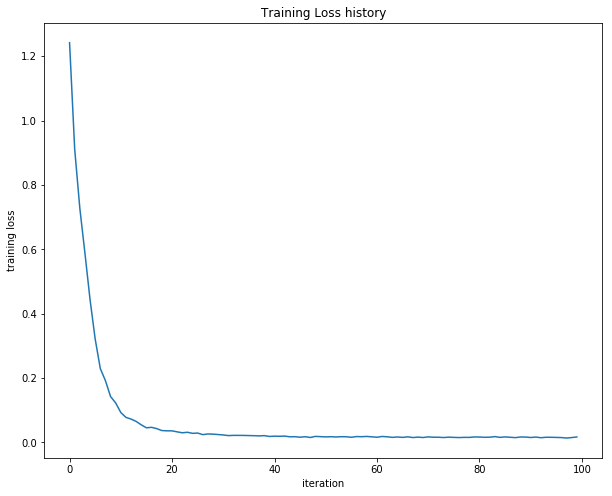

In [11]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [12]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [13]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

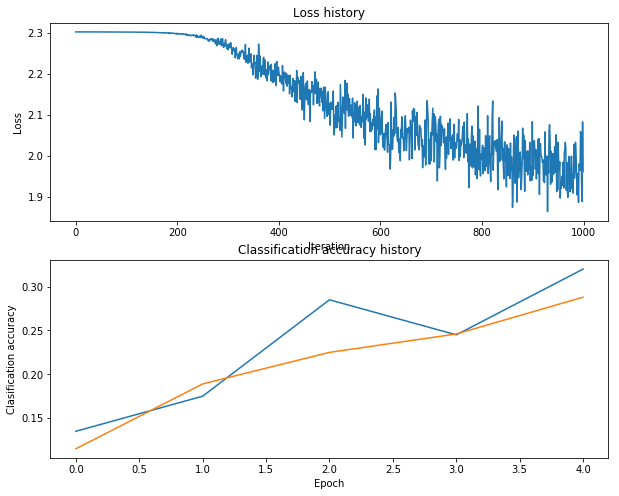

In [14]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

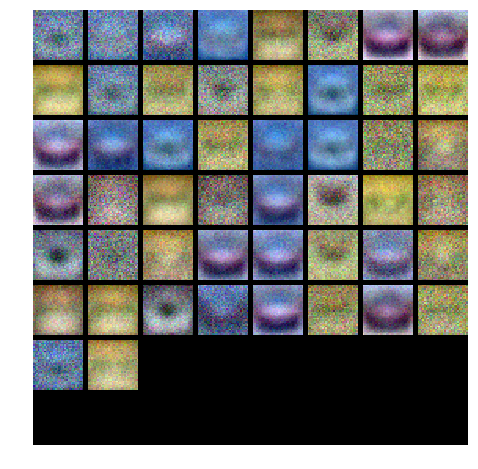

In [15]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [16]:
best_net = None # store the best model into this 
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# np.seterr(all='print')

results = {}
best_val = -1
batch_size = 256
num_iters = 2000

learning_rates = [1e-3, 5e-4, 1e-4] # default: 1e-3
regularization_strengths = [1e-6, 5e-6, 1e-5, 5e-5] # default: 5e-6
learning_rate_decays = [0.95, 0.99, 0.999] # default: 0.95

input_size = 32 * 32 * 3
hidden_size = 150
num_classes = 10

nets = {}

i = 0
for decay in learning_rate_decays:
    for lr in learning_rates:
        for C in regularization_strengths:
            print('decay {}, lr {}, C {}'.format(decay, lr, C))
            print('Done {:2} out of {}'.format(i+1, len(learning_rates)*len(regularization_strengths)*len(learning_rate_decays)))
            
            # train
            net = TwoLayerNet(input_size, hidden_size, num_classes)
            net.train(X_train, y_train, X_val, y_val, num_iters=num_iters, 
                      batch_size=batch_size, learning_rate=lr, 
                      learning_rate_decay=decay,reg=C, verbose=True)
            # predict
            y_train_pred = net.predict(X_train)
            y_val_pred = net.predict(X_val)
            # scoring
            train_score = np.mean(y_train == y_train_pred)
            val_score = np.mean(y_val == y_val_pred)
            # store results
            results[(decay, lr, C)] = (train_score, val_score)
            nets[(decay, lr, C)] = net
            
            i += 1

sorted_results = sorted(results.items(), key=lambda x: x[1][1]) # by val score
best_params = sorted_results[-1][0]
best_val = sorted_results[-1][1][1]
best_net = nets[best_params]
print(best_net.lr_decay, best_net.lr, best_net.C)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

# Print out results.
for decay, lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(decay, lr, reg)]
    print('decay %e lr %e reg %e train accuracy: %f val accuracy: %f' % (
                decay, lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

decay 0.95, lr 0.001, C 1e-06
Done  1 out of 36
iteration 0 / 2000: loss 2.302628
iteration 100 / 2000: loss 1.896605
iteration 200 / 2000: loss 1.692856
iteration 300 / 2000: loss 1.681297
iteration 400 / 2000: loss 1.545002
iteration 500 / 2000: loss 1.505455
iteration 600 / 2000: loss 1.579411
iteration 700 / 2000: loss 1.527705
iteration 800 / 2000: loss 1.323418
iteration 900 / 2000: loss 1.369204
iteration 1000 / 2000: loss 1.391848
iteration 1100 / 2000: loss 1.394681
iteration 1200 / 2000: loss 1.322638
iteration 1300 / 2000: loss 1.376914
iteration 1400 / 2000: loss 1.177608
iteration 1500 / 2000: loss 1.324150
iteration 1600 / 2000: loss 1.356265
iteration 1700 / 2000: loss 1.179193
iteration 1800 / 2000: loss 1.213064
iteration 1900 / 2000: loss 1.155135
decay 0.95, lr 0.001, C 5e-06
Done  2 out of 36
iteration 0 / 2000: loss 2.302570
iteration 100 / 2000: loss 1.931973
iteration 200 / 2000: loss 1.806082
iteration 300 / 2000: loss 1.798914
iteration 400 / 2000: loss 1.62797

iteration 1100 / 2000: loss 1.928813
iteration 1200 / 2000: loss 1.835386
iteration 1300 / 2000: loss 1.743756
iteration 1400 / 2000: loss 1.771840
iteration 1500 / 2000: loss 1.798359
iteration 1600 / 2000: loss 1.807114
iteration 1700 / 2000: loss 1.882096
iteration 1800 / 2000: loss 1.716221
iteration 1900 / 2000: loss 1.658185
decay 0.95, lr 0.0001, C 5e-05
Done 12 out of 36
iteration 0 / 2000: loss 2.302603
iteration 100 / 2000: loss 2.301461
iteration 200 / 2000: loss 2.293023
iteration 300 / 2000: loss 2.229706
iteration 400 / 2000: loss 2.102243
iteration 500 / 2000: loss 2.078264
iteration 600 / 2000: loss 2.036969
iteration 700 / 2000: loss 1.984702
iteration 800 / 2000: loss 1.969563
iteration 900 / 2000: loss 1.905850
iteration 1000 / 2000: loss 1.859752
iteration 1100 / 2000: loss 1.879568
iteration 1200 / 2000: loss 1.884654
iteration 1300 / 2000: loss 1.757474
iteration 1400 / 2000: loss 1.845579
iteration 1500 / 2000: loss 1.776742
iteration 1600 / 2000: loss 1.857463
i

iteration 200 / 2000: loss 2.285568
iteration 300 / 2000: loss 2.201296
iteration 400 / 2000: loss 2.159175
iteration 500 / 2000: loss 2.103412
iteration 600 / 2000: loss 2.073944
iteration 700 / 2000: loss 1.996773
iteration 800 / 2000: loss 1.951018
iteration 900 / 2000: loss 1.881414
iteration 1000 / 2000: loss 1.959847
iteration 1100 / 2000: loss 1.907130
iteration 1200 / 2000: loss 1.928915
iteration 1300 / 2000: loss 1.774649
iteration 1400 / 2000: loss 1.752713
iteration 1500 / 2000: loss 1.795940
iteration 1600 / 2000: loss 1.722722
iteration 1700 / 2000: loss 1.738982
iteration 1800 / 2000: loss 1.713342
iteration 1900 / 2000: loss 1.729321
decay 0.99, lr 0.0001, C 1e-05
Done 23 out of 36
iteration 0 / 2000: loss 2.302606
iteration 100 / 2000: loss 2.300908
iteration 200 / 2000: loss 2.282482
iteration 300 / 2000: loss 2.235113
iteration 400 / 2000: loss 2.152495
iteration 500 / 2000: loss 2.094587
iteration 600 / 2000: loss 2.046188
iteration 700 / 2000: loss 1.931502
iterati

iteration 1400 / 2000: loss 1.560583
iteration 1500 / 2000: loss 1.494643
iteration 1600 / 2000: loss 1.430316
iteration 1700 / 2000: loss 1.473139
iteration 1800 / 2000: loss 1.294459
iteration 1900 / 2000: loss 1.281474
decay 0.999, lr 0.0001, C 1e-06
Done 33 out of 36
iteration 0 / 2000: loss 2.302552
iteration 100 / 2000: loss 2.300842
iteration 200 / 2000: loss 2.282716
iteration 300 / 2000: loss 2.236852
iteration 400 / 2000: loss 2.102336
iteration 500 / 2000: loss 2.013804
iteration 600 / 2000: loss 2.039668
iteration 700 / 2000: loss 1.979320
iteration 800 / 2000: loss 1.999636
iteration 900 / 2000: loss 1.916703
iteration 1000 / 2000: loss 1.836852
iteration 1100 / 2000: loss 1.891383
iteration 1200 / 2000: loss 1.794997
iteration 1300 / 2000: loss 1.844847
iteration 1400 / 2000: loss 1.790001
iteration 1500 / 2000: loss 1.762447
iteration 1600 / 2000: loss 1.667727
iteration 1700 / 2000: loss 1.837620
iteration 1800 / 2000: loss 1.630493
iteration 1900 / 2000: loss 1.667914


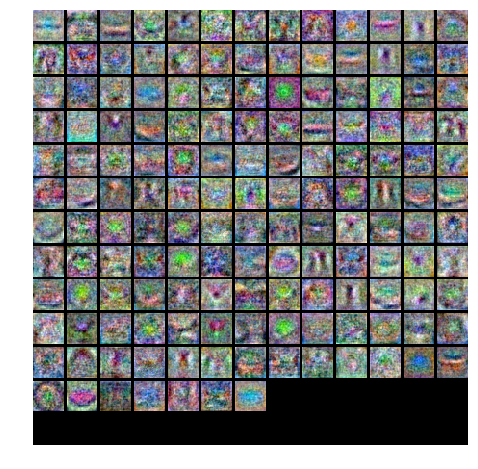

In [19]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [20]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.526


decay 9.500000e-01 lr 1.000000e-04 reg 1.000000e-06 train accuracy: 0.386796 val accuracy: 0.388000
decay 9.500000e-01 lr 1.000000e-04 reg 5.000000e-06 train accuracy: 0.387898 val accuracy: 0.378000
decay 9.500000e-01 lr 1.000000e-04 reg 1.000000e-05 train accuracy: 0.383510 val accuracy: 0.382000
decay 9.500000e-01 lr 1.000000e-04 reg 5.000000e-05 train accuracy: 0.384735 val accuracy: 0.382000
decay 9.500000e-01 lr 5.000000e-04 reg 1.000000e-06 train accuracy: 0.543204 val accuracy: 0.499000
decay 9.500000e-01 lr 5.000000e-04 reg 5.000000e-06 train accuracy: 0.533612 val accuracy: 0.492000
decay 9.500000e-01 lr 5.000000e-04 reg 1.000000e-05 train accuracy: 0.537571 val accuracy: 0.512000
decay 9.500000e-01 lr 5.000000e-04 reg 5.000000e-05 train accuracy: 0.538531 val accuracy: 0.504000
decay 9.500000e-01 lr 1.000000e-03 reg 1.000000e-06 train accuracy: 0.585531 val accuracy: 0.530000
decay 9.500000e-01 lr 1.000000e-03 reg 5.000000e-06 train accuracy: 0.581633 val accuracy: 0.490000
decay 9.500000e-01 lr 1.000000e-03 reg 1.000000e-05 train accuracy: 0.564082 val accuracy: 0.499000
decay 9.500000e-01 lr 1.000000e-03 reg 5.000000e-05 train accuracy: 0.576735 val accuracy: 0.512000
decay 9.900000e-01 lr 1.000000e-04 reg 1.000000e-06 train accuracy: 0.391082 val accuracy: 0.387000
decay 9.900000e-01 lr 1.000000e-04 reg 5.000000e-06 train accuracy: 0.390633 val accuracy: 0.393000
decay 9.900000e-01 lr 1.000000e-04 reg 1.000000e-05 train accuracy: 0.390816 val accuracy: 0.387000
decay 9.900000e-01 lr 1.000000e-04 reg 5.000000e-05 train accuracy: 0.392714 val accuracy: 0.384000
decay 9.900000e-01 lr 5.000000e-04 reg 1.000000e-06 train accuracy: 0.540694 val accuracy: 0.500000
decay 9.900000e-01 lr 5.000000e-04 reg 5.000000e-06 train accuracy: 0.541000 val accuracy: 0.494000
decay 9.900000e-01 lr 5.000000e-04 reg 1.000000e-05 train accuracy: 0.542041 val accuracy: 0.509000
decay 9.900000e-01 lr 5.000000e-04 reg 5.000000e-05 train accuracy: 0.541306 val accuracy: 0.485000
decay 9.900000e-01 lr 1.000000e-03 reg 1.000000e-06 train accuracy: 0.583265 val accuracy: 0.517000
decay 9.900000e-01 lr 1.000000e-03 reg 5.000000e-06 train accuracy: 0.575673 val accuracy: 0.525000
decay 9.900000e-01 lr 1.000000e-03 reg 1.000000e-05 train accuracy: 0.575245 val accuracy: 0.516000
decay 9.900000e-01 lr 1.000000e-03 reg 5.000000e-05 train accuracy: 0.572571 val accuracy: 0.512000
decay 9.990000e-01 lr 1.000000e-04 reg 1.000000e-06 train accuracy: 0.392367 val accuracy: 0.382000
decay 9.990000e-01 lr 1.000000e-04 reg 5.000000e-06 train accuracy: 0.392388 val accuracy: 0.383000
decay 9.990000e-01 lr 1.000000e-04 reg 1.000000e-05 train accuracy: 0.393327 val accuracy: 0.386000
decay 9.990000e-01 lr 1.000000e-04 reg 5.000000e-05 train accuracy: 0.391857 val accuracy: 0.385000
decay 9.990000e-01 lr 5.000000e-04 reg 1.000000e-06 train accuracy: 0.544163 val accuracy: 0.509000
decay 9.990000e-01 lr 5.000000e-04 reg 5.000000e-06 train accuracy: 0.538714 val accuracy: 0.497000
decay 9.990000e-01 lr 5.000000e-04 reg 1.000000e-05 train accuracy: 0.539204 val accuracy: 0.490000
decay 9.990000e-01 lr 5.000000e-04 reg 5.000000e-05 train accuracy: 0.541143 val accuracy: 0.506000
decay 9.990000e-01 lr 1.000000e-03 reg 1.000000e-06 train accuracy: 0.573490 val accuracy: 0.518000
decay 9.990000e-01 lr 1.000000e-03 reg 5.000000e-06 train accuracy: 0.579469 val accuracy: 0.497000
decay 9.990000e-01 lr 1.000000e-03 reg 1.000000e-05 train accuracy: 0.581776 val accuracy: 0.509000
decay 9.990000e-01 lr 1.000000e-03 reg 5.000000e-05 train accuracy: 0.576551 val accuracy: 0.496000
best validation accuracy achieved during cross-validation: 0.530000

decay 9.500000e-01 lr 1.000000e-04 reg 5.000000e-06 train accuracy: 0.307429 val accuracy: 0.301000
decay 9.500000e-01 lr 5.000000e-04 reg 5.000000e-06 train accuracy: 0.460102 val accuracy: 0.458000
decay 9.500000e-01 lr 1.000000e-03 reg 5.000000e-06 train accuracy: 0.502714 val accuracy: 0.494000
decay 9.500000e-01 lr 5.000000e-03 reg 5.000000e-06 train accuracy: 0.100265 val accuracy: 0.087000
decay 9.900000e-01 lr 1.000000e-04 reg 5.000000e-06 train accuracy: 0.315122 val accuracy: 0.312000
decay 9.900000e-01 lr 5.000000e-04 reg 5.000000e-06 train accuracy: 0.461980 val accuracy: 0.450000
decay 9.900000e-01 lr 1.000000e-03 reg 5.000000e-06 train accuracy: 0.477143 val accuracy: 0.463000
decay 9.900000e-01 lr 5.000000e-03 reg 5.000000e-06 train accuracy: 0.100265 val accuracy: 0.087000
decay 9.990000e-01 lr 1.000000e-04 reg 5.000000e-06 train accuracy: 0.318408 val accuracy: 0.313000
decay 9.990000e-01 lr 5.000000e-04 reg 5.000000e-06 train accuracy: 0.462837 val accuracy: 0.463000
decay 9.990000e-01 lr 1.000000e-03 reg 5.000000e-06 train accuracy: 0.489429 val accuracy: 0.464000
decay 9.990000e-01 lr 5.000000e-03 reg 5.000000e-06 train accuracy: 0.100265 val accuracy: 0.087000
best validation accuracy achieved during cross-validation: 0.494000

batch_size = 200
num_iters = 1000
hidden_size = 100


decay 9.900000e-01 lr 1.000000e-05 reg 1.000000e-07 train accuracy: 0.614388 val accuracy: 0.542000
decay 9.900000e-01 lr 1.000000e-05 reg 1.000000e-06 train accuracy: 0.611694 val accuracy: 0.539000
decay 9.900000e-01 lr 1.000000e-05 reg 5.000000e-06 train accuracy: 0.613735 val accuracy: 0.540000
decay 9.900000e-01 lr 5.000000e-05 reg 1.000000e-07 train accuracy: 0.628612 val accuracy: 0.541000
decay 9.900000e-01 lr 5.000000e-05 reg 1.000000e-06 train accuracy: 0.619735 val accuracy: 0.544000
decay 9.900000e-01 lr 5.000000e-05 reg 5.000000e-06 train accuracy: 0.624490 val accuracy: 0.530000
decay 9.900000e-01 lr 1.000000e-04 reg 1.000000e-07 train accuracy: 0.429551 val accuracy: 0.434000
decay 9.900000e-01 lr 1.000000e-04 reg 1.000000e-06 train accuracy: 0.314347 val accuracy: 0.303000
decay 9.900000e-01 lr 1.000000e-04 reg 5.000000e-06 train accuracy: 0.386816 val accuracy: 0.379000
decay 9.900000e-01 lr 5.000000e-04 reg 1.000000e-07 train accuracy: 0.596531 val accuracy: 0.529000
decay 9.900000e-01 lr 5.000000e-04 reg 1.000000e-06 train accuracy: 0.512776 val accuracy: 0.478000
decay 9.900000e-01 lr 5.000000e-04 reg 5.000000e-06 train accuracy: 0.562857 val accuracy: 0.531000
decay 9.990000e-01 lr 1.000000e-05 reg 1.000000e-07 train accuracy: 0.715102 val accuracy: 0.563000
decay 9.990000e-01 lr 1.000000e-05 reg 1.000000e-06 train accuracy: 0.709612 val accuracy: 0.556000
decay 9.990000e-01 lr 1.000000e-05 reg 5.000000e-06 train accuracy: 0.713061 val accuracy: 0.559000
decay 9.990000e-01 lr 5.000000e-05 reg 1.000000e-07 train accuracy: 0.725286 val accuracy: 0.551000
decay 9.990000e-01 lr 5.000000e-05 reg 1.000000e-06 train accuracy: 0.718816 val accuracy: 0.555000
decay 9.990000e-01 lr 5.000000e-05 reg 5.000000e-06 train accuracy: 0.721857 val accuracy: 0.553000
decay 9.990000e-01 lr 1.000000e-04 reg 1.000000e-07 train accuracy: 0.647184 val accuracy: 0.540000
decay 9.990000e-01 lr 1.000000e-04 reg 1.000000e-06 train accuracy: 0.634367 val accuracy: 0.546000
decay 9.990000e-01 lr 1.000000e-04 reg 5.000000e-06 train accuracy: 0.639653 val accuracy: 0.544000
decay 9.990000e-01 lr 5.000000e-04 reg 1.000000e-07 train accuracy: 0.638429 val accuracy: 0.486000
decay 9.990000e-01 lr 5.000000e-04 reg 1.000000e-06 train accuracy: 0.643571 val accuracy: 0.539000
decay 9.990000e-01 lr 5.000000e-04 reg 5.000000e-06 train accuracy: 0.669714 val accuracy: 0.537000
best validation accuracy achieved during cross-validation: 0.563000

batch_size = 256
num_iters = 1000
hidden_size = 100